<a href="https://colab.research.google.com/github/meghna-droid/tatamotors_prediction/blob/main/tatamotors_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from pandas_datareader import data as pdr
import yfinance as yf


yf.pdr_override()


In [ ]:
import scipy

In [ ]:
tata = pdr.get_data_yahoo("TATAMOTORS.NS", start="2010-01-01", end="2022-7-20")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tata.to_csv('TATAMOTORS.csv')

In [ ]:
import pandas as pd

In [ ]:
tata = pd.read_csv('TATAMOTORS.csv')

In [ ]:
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140778,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552765,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349579,16495776


In [ ]:
tata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3092,2022-07-13,432.700012,435.850006,425.649994,427.100006,427.100006,10181698
3093,2022-07-14,428.000000,431.250000,423.299988,428.049988,428.049988,10744547
3094,2022-07-15,430.649994,441.750000,429.700012,440.200012,440.200012,15774084
3095,2022-07-18,443.950012,453.799988,443.200012,450.899994,450.899994,21185764
3096,2022-07-19,446.750000,451.850006,444.450012,449.049988,449.049988,11553440


In [ ]:
tata1 = tata.reset_index()['Close']

In [ ]:
tata1.shape

(3097,)

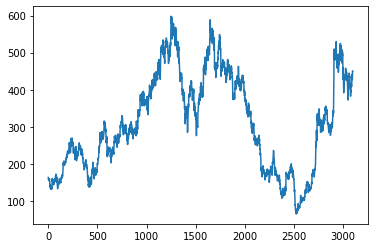

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tata1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
tata1=scaler.fit_transform(np.array(tata1).reshape(-1,1))

In [ ]:
tata1

array([[0.18436482],
       [0.17901711],
       [0.17948132],
       ...,
       [0.70359574],
       [0.72367699],
       [0.72020498]])

In [ ]:
##splitting data set into train and test split
training_size =int(len(tata1)*0.70)
test_size = len(tata1)-training_size
train_data,test_data=tata1[0:training_size,:],tata1[training_size:len(tata1),:1]


In [ ]:
training_size,test_size

(2167, 930)

In [ ]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0] ###{=0,0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return numpy.array(dataX),numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train,y_train = create_dataset(test_data,time_step)
x_test,y_test =create_dataset(test_data,time_step)

In [ ]:
print(x_train)

[[0.22342777 0.22624291 0.21517003 ... 0.23271771 0.21751598 0.21873588]
 [0.22624291 0.21517003 0.20531706 ... 0.21751598 0.21873588 0.22427231]
 [0.21517003 0.20531706 0.19790388 ... 0.21873588 0.22427231 0.21845435]
 ...
 [0.81573189 0.80296992 0.80540973 ... 0.69768391 0.685485   0.67901022]
 [0.80296992 0.80540973 0.77500627 ... 0.685485   0.67901022 0.68079311]
 [0.80540973 0.77500627 0.77266032 ... 0.67901022 0.68079311 0.70359574]]


In [ ]:
print(x_test.shape),print(y_test.shape)

(829, 100)
(829,)


(None, None)

In [ ]:
#reshape input to be[samples.time steps,features] which is required for LSTM model
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test =x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
### create a LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 14s 363ms/step - loss: 0.0556 - val_loss: 0.0106
Epoch 2/100
13/13 [==============================] - 3s 243ms/step - loss: 0.0104 - val_loss: 0.0067
Epoch 3/100
13/13 [==============================] - 3s 246ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 4/100
13/13 [==============================] - 4s 281ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 5/100
13/13 [==============================] - 3s 240ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/100
13/13 [==============================] - 3s 245ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/100
13/13 [==============================] - 3s 238ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 8/100
13/13 [==============================] - 3s 242ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/100
13/13 [==============================] - 3s 243ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/100
13/13 [==============================] - 3s 245ms/step - loss: 0.0021 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
### lets do the prediction and check the metrics
train_predict=model.predict(x_train)
test_predict=model.predict(X_test)

26/26 [==============================] - 1s 38ms/step


In [ ]:
## Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
## calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

291.99854155284885

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

291.99854155284885

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(tata1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(tata1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tata1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(tata1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: ignored

In [ ]:
len(test_data)

930

In [ ]:
x_input=test_data[830:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

[0.7726603232804509,
 0.6806054782332164,
 0.7402862871488368,
 0.7295887566479052,
 0.7174837166326817,
 0.6977777815960471,
 0.6605241691434109,
 0.6168895987051486,
 0.6126668983401554,
 0.63922298029186,
 0.6649345565349895,
 0.6622132378346004,
 0.650108197819377,
 0.6537678371046141,
 0.6748813389295798,
 0.691584453362967,
 0.6806054782332164,
 0.7038772376788149,
 0.6953379647985165,
 0.6904584457515336,
 0.6883940030071735,
 0.6895200678926463,
 0.691396823610421,
 0.695056462895658,
 0.6914906384866939,
 0.705378619343419,
 0.7158884628177654,
 0.7370957795190042,
 0.7335299551100399,
 0.7210495410416459,
 0.7258352452123559,
 0.7258352452123559,
 0.7000298540929534,
 0.6864233751390866,
 0.691584453362967,
 0.6749752110798921,
 0.7042525544579464,
 0.7183282223412569,
 0.7010621041021529,
 0.6753505278590234,
 0.693648896107327,
 0.6849219934744823,
 0.6958071537279602,
 0.6987161594549345,
 0.6898015697955046,
 0.672253892379503,
 0.6775087854796566,
 0.6441963714891552,
 0

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7293501]
101
1 day input [0.68060548 0.74028629 0.72958876 0.71748372 0.69777778 0.66052417
 0.6168896  0.6126669  0.63922298 0.66493456 0.66221324 0.6501082
 0.65376784 0.67488134 0.69158445 0.68060548 0.70387724 0.69533796
 0.69045845 0.688394   0.68952007 0.69139682 0.69505646 0.69149064
 0.70537862 0.71588846 0.73709578 0.73352996 0.72104954 0.72583525
 0.72583525 0.70002985 0.68642338 0.69158445 0.67497521 0.70425255
 0.71832822 0.7010621  0.67535053 0.6936489  0.68492199 0.69580715
 0.69871616 0.68980157 0.67225389 0.67750879 0.64419637 0.63556334
 0.6126669  0.60591057 0.57616398 0.63622016 0.63819079 0.67347377
 0.65658297 0.6256165  0.66193174 0.66840657 0.67647659 0.66005498
 0.66690513 0.68370211 0.70772456 0.70988282 0.71185345 0.70162511
 0.68801863 0.68886319 0.69543184 0.69505646 0.68163767 0.68079311
 0.64072442 0.63781541 0.6546124  0.61491903 0.60741201 0.59568228
 0.62364593 0.61520053 0.6416628  0.64560394 0.65536309 0.66024267
 0.65996117 0.65029583 0.65198495 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(tata1)

3097

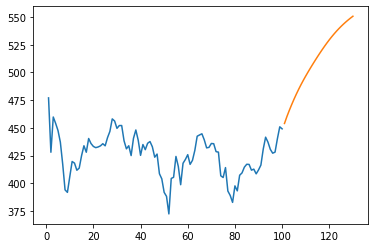

In [ ]:
plt.plot(day_new,scaler.inverse_transform(tata1[2997:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

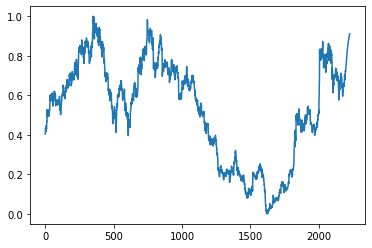

In [ ]:
df3=tata1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

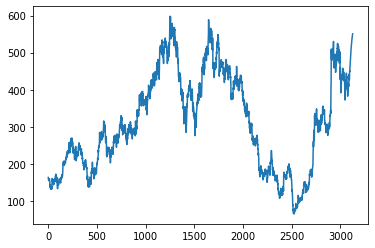

In [ ]:
plt.plot(df3)